# E9 213 Time Frequency Analysis - Assignment 1
***
*Submitted by: Dwaipayan Haldar*<br>
*S.R. No. : 27128*

In [2]:
# Code to import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift

### Problem 2: Simulation of Plots

In [123]:
#Defining the functions

#Sinc function
def sinc():
    t = np.arange(-5,5,0.05)
    y = np.sin(2*np.pi*t)/(2*np.pi*t)
    return t,y

#Two delta function one at +1 and other at -1 
def two_delta():
    t = np.arange(-5, 5, 0.05)
    y = np.zeros_like(t)
    index_pos = np.argmin(np.abs(t - 1))
    index_neg = np.argmin(np.abs(t + 1))
    y[index_pos] = 1
    y[index_neg] = 1
    return y

#Exponential function
def exp(a = 0.25):
    t = np.arange(-5,5,0.05)
    exp = np.exp(-a*t**2)
    return exp

#Delta functions convoluted with the exponential
def exp_conv_delta(a = 1):
    t = np.arange(-5,5,0.05)
    gaussian1 = np.exp(-a * (t - 1)**2)
    gaussian2 = np.exp(-a * (t + 1)**2)
    y = (gaussian1+gaussian2)
    return t, y

#Delta functions multiplied with the exponential
def exp_mul_delta():
    t = np.arange(-5,5,0.05)
    exp_mul_del = exp() * two_delta()
    return t, exp_mul_del

#Exponential multiplied with the cos function
def exp_cos(omega_0 = 25*np.pi):
    t = np.arange(-5,5,0.05)
    exp_cos = exp()*np.cos(omega_0*t)*np.heaviside(t, 1)
    return t, exp_cos


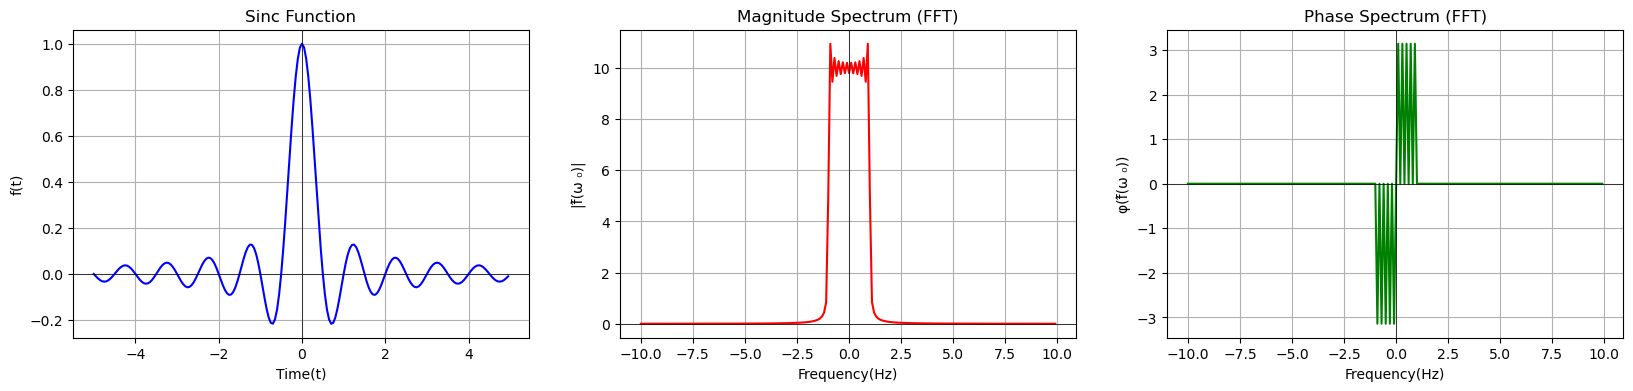

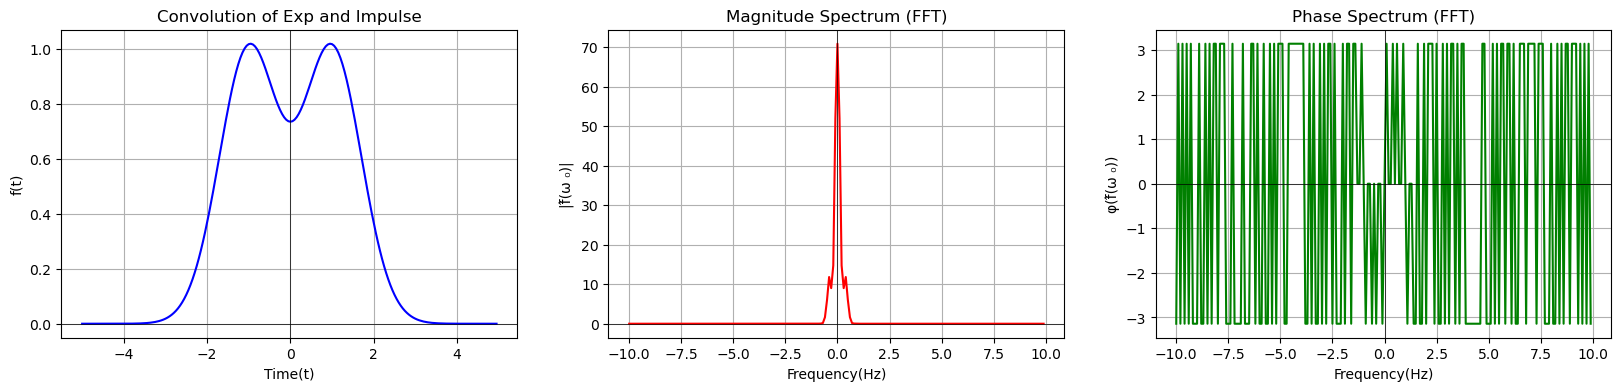

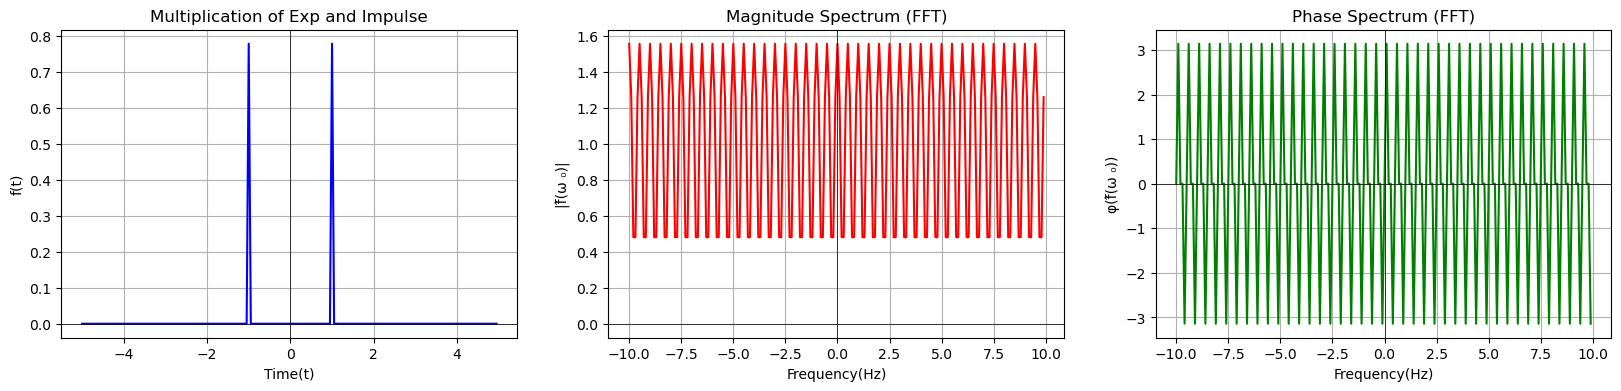

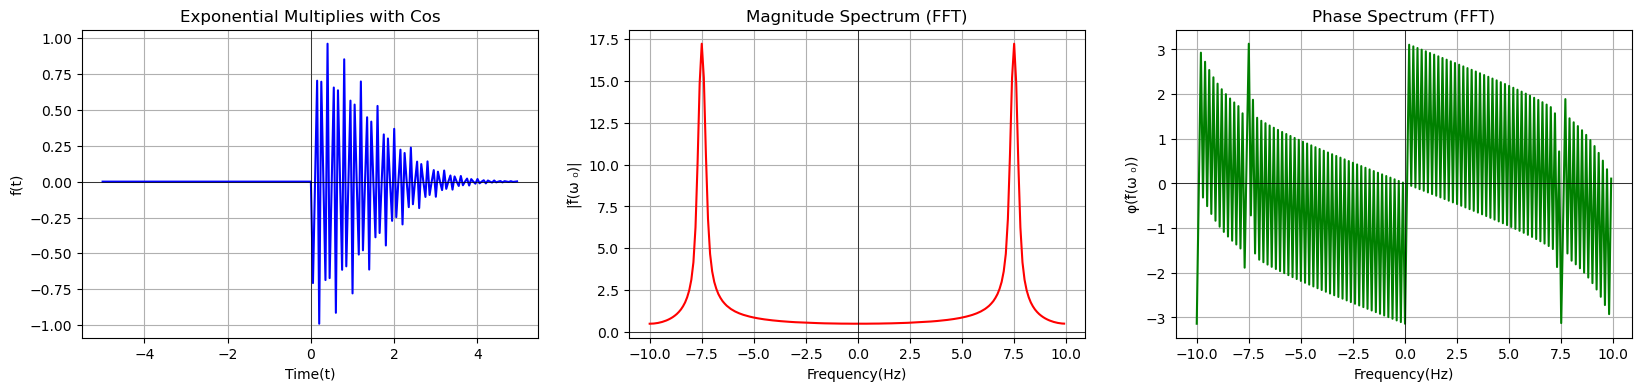

In [126]:
def plot_signal_and_fft(signal_func, label="Signal"):
    """This function takes as input the signal for which the FFT is to be calculated. 
    The label parameter gives the function label in the graph sketched. Nothing Much."""
    t, y = signal_func()
    y_fft = fft(y)
    y_fft_shifted = fftshift(y_fft) 
    t_fft = fftshift(fftfreq(len(t), d=(t[1]-t[0]))) 

    plt.figure(figsize=(20, 4))

    # Original signal
    plt.subplot(1,3,1)
    plt.plot(t, y, color='blue')
    plt.xlabel('Time(t)')
    plt.ylabel('f(t)')
    plt.title(f'{label}')
    plt.grid(True)
    plt.axhline(0, color='black', linewidth=0.5) 
    plt.axvline(0, color='black', linewidth=0.5) 

    # Magnitude spectrum 
    plt.subplot(1,3,2)
    plt.plot(t_fft, np.abs(y_fft_shifted), color='red')
    plt.xlabel('Frequency(Hz)')
    plt.ylabel('|f\u0302(\u03C9 \u2080)|')
    plt.title(f'Magnitude Spectrum (FFT)')
    plt.grid(True)
    plt.axhline(0, color='black', linewidth=0.5) 
    plt.axvline(0, color='black', linewidth=0.5) 

    #Phase Spectrum
    plt.subplot(1,3,3)
    plt.plot(t_fft, np.angle(y_fft_shifted), color='green')
    plt.xlabel('Frequency(Hz)')
    plt.ylabel('\u03C6(f\u0302(\u03C9 \u2080))')
    plt.title(f'Phase Spectrum (FFT)')
    plt.grid(True)
    plt.axhline(0, color='black', linewidth=0.5) 
    plt.axvline(0, color='black', linewidth=0.5) 

    plt.show()

plot_signal_and_fft(sinc, label="Sinc Function")
plot_signal_and_fft(exp_conv_delta, label="Convolution of Exp and Impulse")
plot_signal_and_fft(exp_mul_delta, label="Multiplication of Exp and Impulse")
plot_signal_and_fft(exp_cos, label= "Exponential Multiplies with Cos")

### Problem 3: Discrete Fourier Transform

In [ ]:
#Defining the myDFT function. Simply based on the formula. I have used vectorized code using numpy library for faster execution.
def myDFT(x, N):
    w_n = np.exp(-2j * np.pi / N)
    W = np.array([[w_n**(k*m) for m in range(N)] for k in range(N)])
    y = np.zeros(N, dtype = complex)
    for i in range(N):
        y[i] = np.dot(W[:,i],x)
    return y

In [40]:
#Defining Kronecker Delta function
def delta(N=50):
    n = np.arange(-N//2, N//2)
    x = np.zeros(N)
    x[N//2] = 1  
    return n, x

#Defining the box function
def rect(N=50):
    n = np.arange(-N//2, N//2) 
    x = np.where(np.abs(n) <= 2, 1, 0)
    return n, x

#Defining the exponential deacy function
def exp_decay(N=50):
    n = np.arange(-N//2, N//2)
    x = 1/2**(np.abs(n))
    return n, x

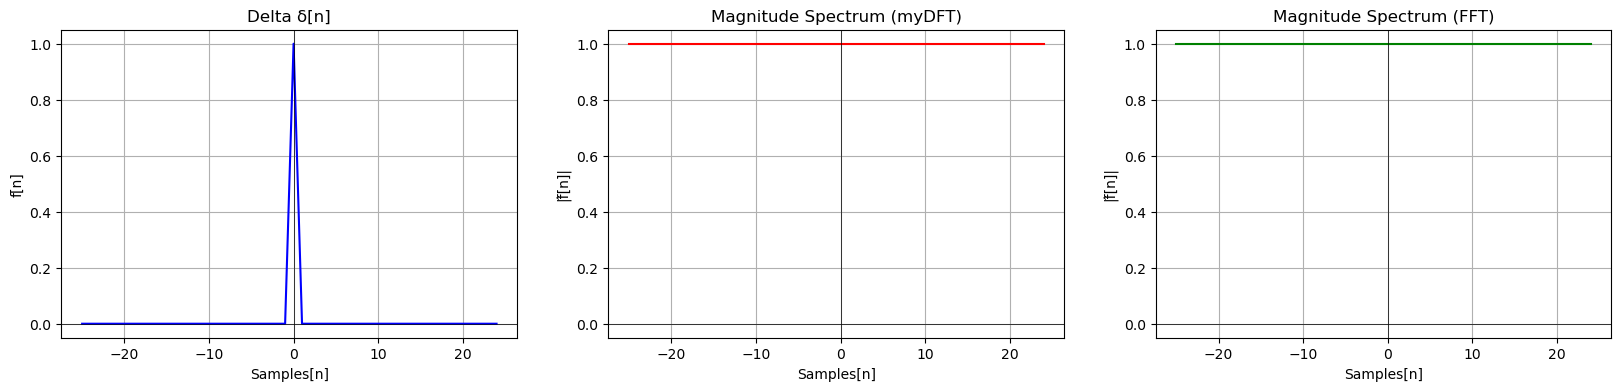

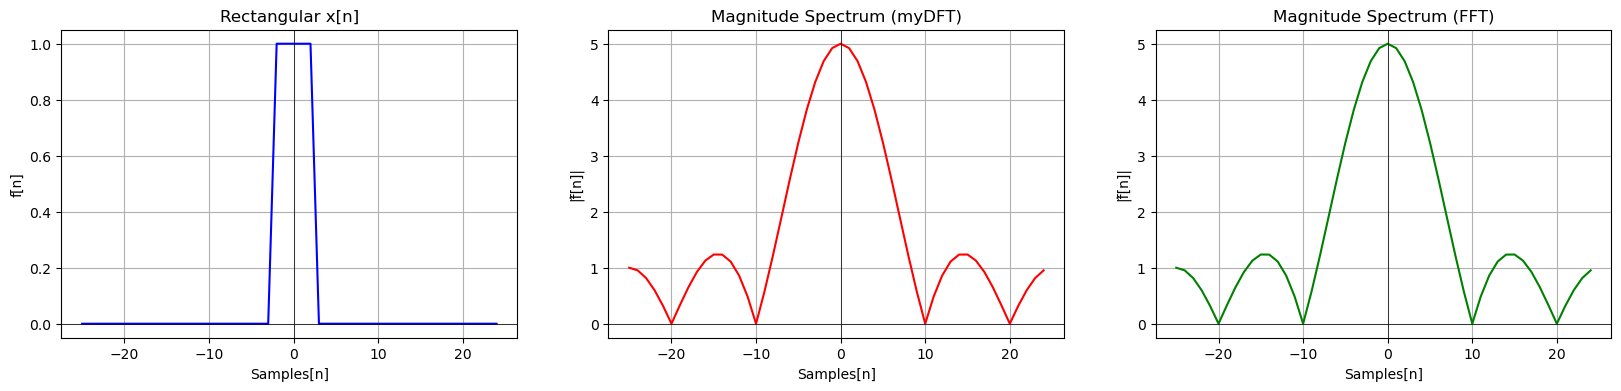

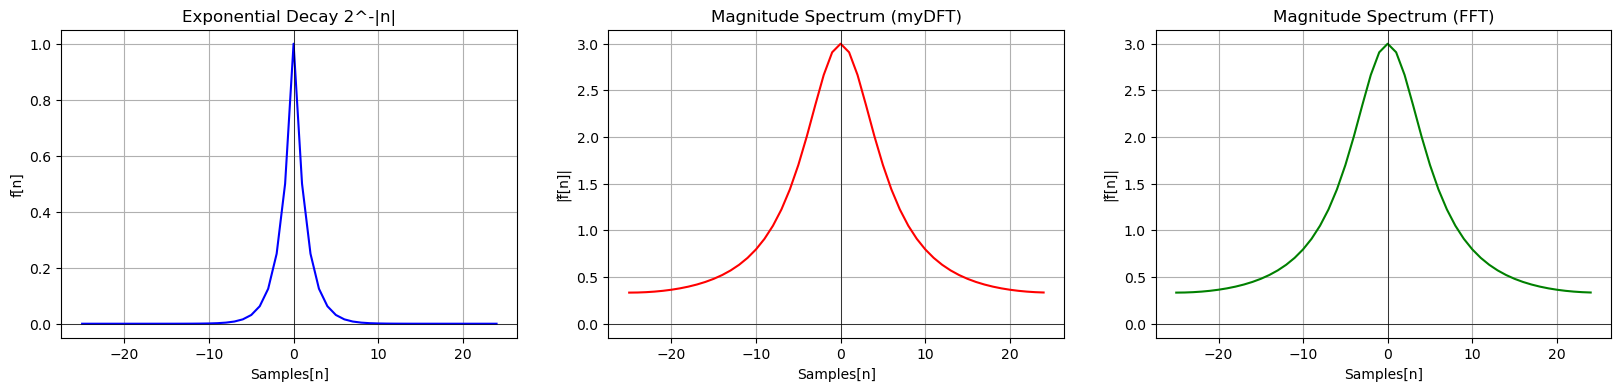

In [41]:
def plot_signal_and_dft(signal_func, label="Signal"):
    """This function takes as input the signal for which the DFT is to be calculated. 
    The label parameter gives the function label in the graph sketched. Nothing Much."""
    n, x = signal_func()
    y_mydft = myDFT(x, len(x))
    y_fft = fft(x)
    y_mydft = fftshift(y_mydft)
    y_fft = fftshift(y_fft)

    plt.figure(figsize=(20, 4))

    # Original signal
    plt.subplot(1,3,1)
    plt.plot(n, x, color='blue')
    plt.xlabel('Samples[n]')
    plt.ylabel('f[n]')
    plt.title(f'{label}')
    plt.grid(True)
    plt.axhline(0, color='black', linewidth=0.5) 
    plt.axvline(0, color='black', linewidth=0.5) 

    # myDFT spectrum
    plt.subplot(1,3,2)
    plt.plot(n, np.abs(y_mydft), color='red')
    plt.xlabel('Samples[n]')
    plt.ylabel('|f\u0302[n]|')
    plt.title(f'Magnitude Spectrum (myDFT)')
    plt.grid(True)
    plt.axhline(0, color='black', linewidth=0.5) 
    plt.axvline(0, color='black', linewidth=0.5) 

    # FFT spectrum from library function
    plt.subplot(1,3,3)
    plt.plot(n, np.abs(y_fft), color='green')
    plt.xlabel('Samples[n]')
    plt.ylabel('|f\u0302[n]|')
    plt.title(f'Magnitude Spectrum (FFT)')
    plt.grid(True)
    plt.axhline(0, color='black', linewidth=0.5) 
    plt.axvline(0, color='black', linewidth=0.5) 

    plt.show()

plot_signal_and_dft(delta, label="Delta \u03B4[n]")
plot_signal_and_dft(rect, label="Rectangular x[n]")
plot_signal_and_dft(exp_decay, label="Exponential Decay 2^-|n|")